In [1]:
# --- Cell 1: Imports & setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.figsize"] = (9, 4.8)
plt.rcParams["axes.grid"] = True

FILE_PATH = Path("pqt.xlsx")  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Excel file, first sheet
df = pd.read_excel("pqt.xlsx", sheet_name=0)

# Make sure the Date column is parsed
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Rename temperature column to a consistent name (adjust if needed)
df.rename(columns={"Temp": "T_C"}, inplace=True)


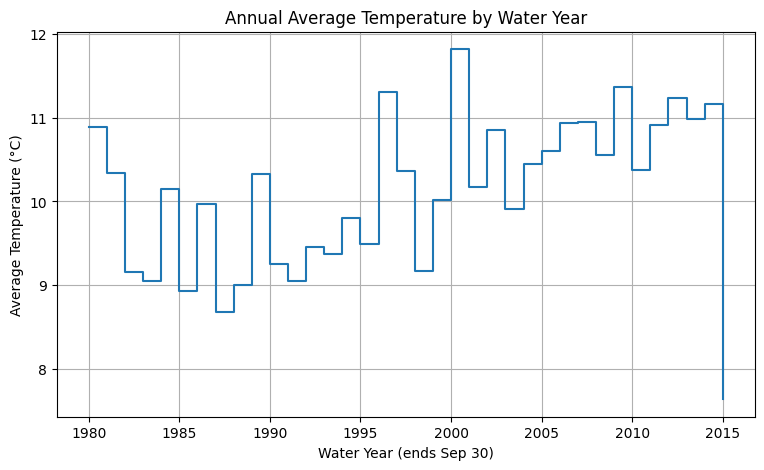

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load your Excel file ---
df = pd.read_excel("pqt.xlsx", sheet_name=0)

# --- Parse the Date column ---
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# --- Rename columns for easier access ---
df.rename(columns={
    "P (mm/day)": "P_mm_day",
    "Q (mm/day)": "Q_mm_day",
    "Tavg (C)": "T_C"
}, inplace=True)

# --- Add Water Year (WY) ---
# Water year = calendar year + 1 if month >= Oct
df["WY"] = df["Date"].dt.year + (df["Date"].dt.month >= 10).astype(int)

# --- Compute annual average temperature by WY ---
wy_temp = df.groupby("WY", as_index=False).agg(avg_T_C=("T_C", "mean"))

# --- Make a step plot ---
plt.figure(figsize=(9,5))
plt.step(wy_temp["WY"], wy_temp["avg_T_C"], where="post")
plt.xlabel("Water Year (ends Sep 30)")
plt.ylabel("Average Temperature (°C)")
plt.title("Annual Average Temperature by Water Year")
plt.grid(True)
plt.show()


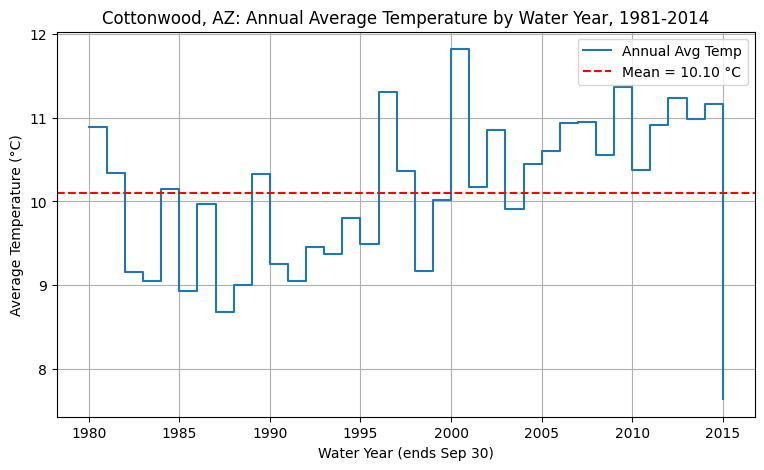

In [5]:
# --- Compute long-term mean of annual avg temps ---
long_term_mean = wy_temp["avg_T_C"].mean()

# --- Step plot with long-term mean line ---
plt.figure(figsize=(9,5))

# Step plot of annual averages
plt.step(wy_temp["WY"], wy_temp["avg_T_C"], where="post", label="Annual Avg Temp")

# Horizontal line for long-term mean
plt.axhline(y=long_term_mean, color="red", linestyle="--", label=f"Mean = {long_term_mean:.2f} °C")

# Labels & title
plt.xlabel("Water Year (ends Sep 30)")
plt.ylabel("Average Temperature (°C)")
plt.title("Cottonwood, AZ: Annual Average Temperature by Water Year, 1981-2014")
plt.grid(True)
plt.legend()

plt.show()
